# MCA poison - ggplot

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
from scientisttools import load_poison
poison = load_poison()
poison.head(6)

,Age,Time,Sick,Sex,Nausea,Vomiting,Abdominals,Fever,Diarrhae,Potato,Fish,Mayo,Courgette,Cheese,Icecream
rownames,,,,,,,,,,,,,,,
1,9,22,Sick_y,F,Nausea_y,Vomit_n,Abdo_y,Fever_y,Diarrhea_y,Potato_y,Fish_y,Mayo_y,Courg_y,Cheese_y,Icecream_y
2,5,0,Sick_n,F,Nausea_n,Vomit_n,Abdo_n,Fever_n,Diarrhea_n,Potato_y,Fish_y,Mayo_y,Courg_y,Cheese_n,Icecream_y
3,6,16,Sick_y,F,Nausea_n,Vomit_y,Abdo_y,Fever_y,Diarrhea_y,Potato_y,Fish_y,Mayo_y,Courg_y,Cheese_y,Icecream_y
4,9,0,Sick_n,F,Nausea_n,Vomit_n,Abdo_n,Fever_n,Diarrhea_n,Potato_y,Fish_y,Mayo_n,Courg_y,Cheese_y,Icecream_y
5,7,14,Sick_y,M,Nausea_n,Vomit_y,Abdo_y,Fever_y,Diarrhea_y,Potato_y,Fish_y,Mayo_y,Courg_y,Cheese_y,Icecream_y
6,72,9,Sick_y,M,Nausea_n,Vomit_n,Abdo_y,Fever_y,Diarrhea_y,Potato_y,Fish_n,Mayo_y,Courg_y,Cheese_y,Icecream_y


In [3]:
from scientisttools import MCA
res_mca = MCA(n_components=5,ind_sup=list(range(50,55)),quali_sup = [2,3],quanti_sup =[0,1])
res_mca.fit(poison)

MCA(ind_sup=[50, 51, 52, 53, 54], quali_sup=[2, 3], quanti_sup=[0, 1])

## Eigenvalues

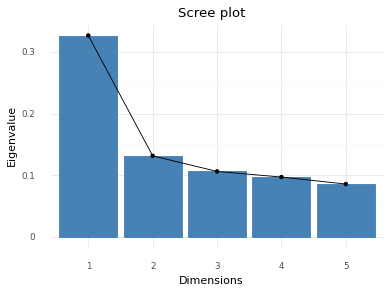

In [4]:
from scientisttools import fviz_screeplot
p = fviz_screeplot(res_mca,choice="eigenvalue")
print(p)

## Individuals

### Color by RGB

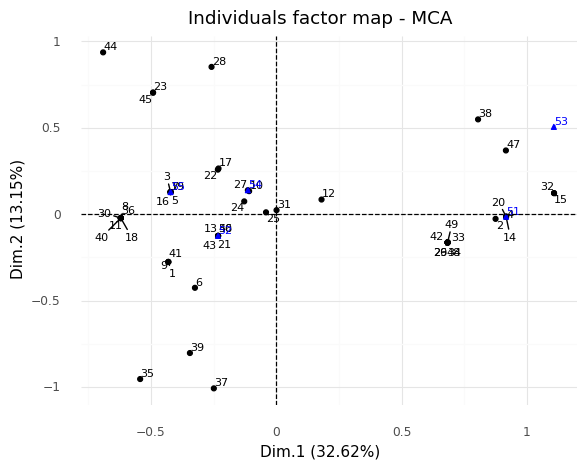

In [5]:
from scientisttools import fviz_mca_ind
p = fviz_mca_ind(res_mca,repel=True)
print(p)

### Color by cos2

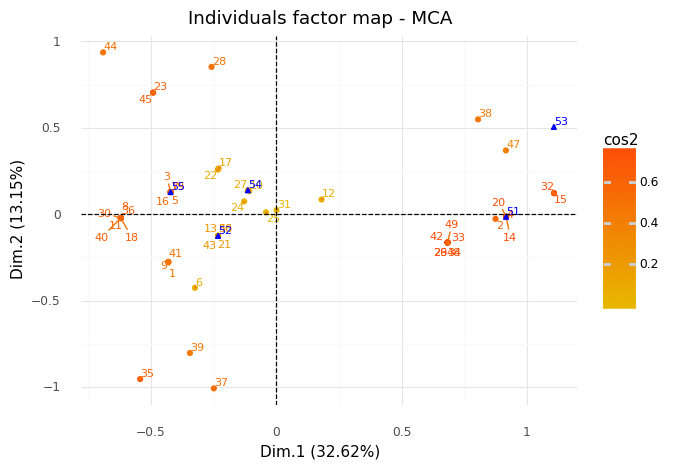

In [6]:
p = fviz_mca_ind(res_mca,color="cos2",repel=True)
print(p)

### Color by contrib

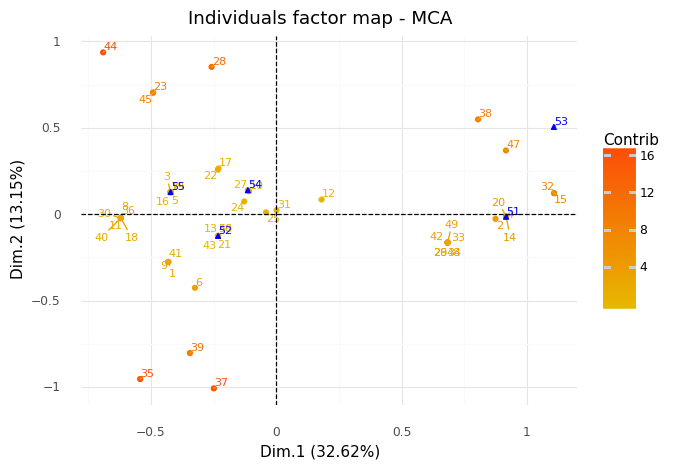

In [7]:
p = fviz_mca_ind(res_mca,color="contrib",repel=True)
print(p)

## Color by quantitatives variables

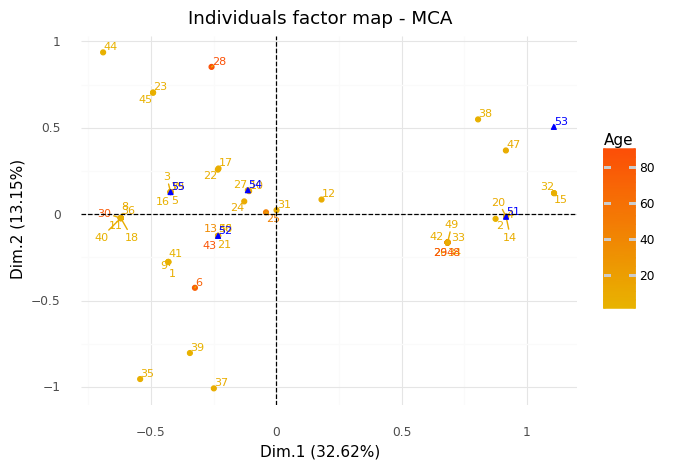

In [8]:
p = fviz_mca_ind(res_mca,color="Age",repel=True)
print(p)

### Color by active qualitatives columns

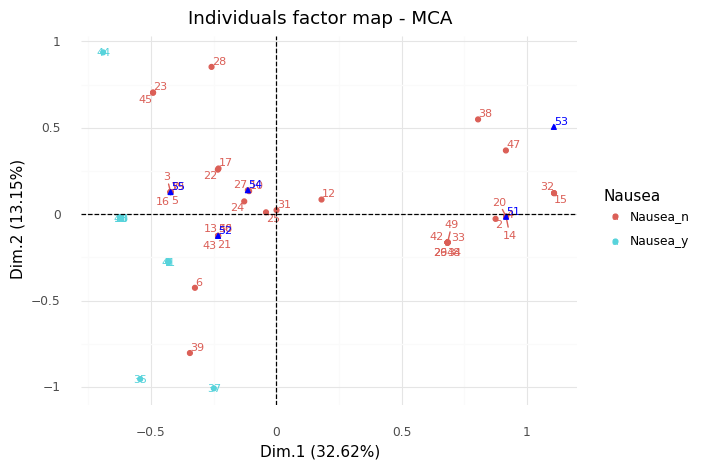

In [9]:
p = fviz_mca_ind(res_mca,habillage=poison.columns.tolist()[4],repel=True)
print(p)

### Color by supplementary qualitatives columns

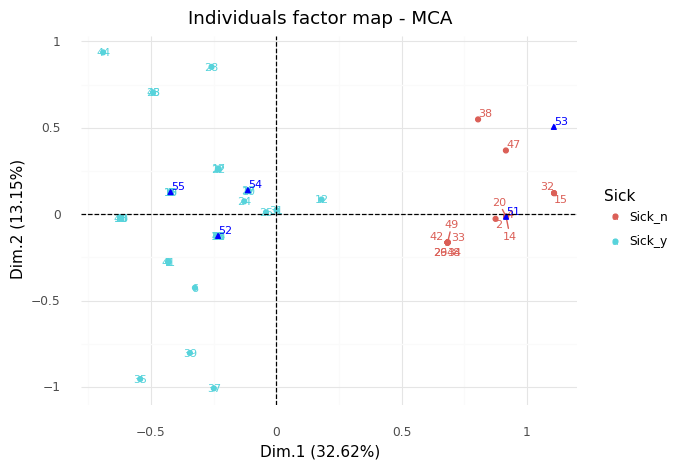

In [10]:
p = fviz_mca_ind(res_mca,habillage=poison.columns.tolist()[2],repel=True)
print(p)

### Color by numpy array

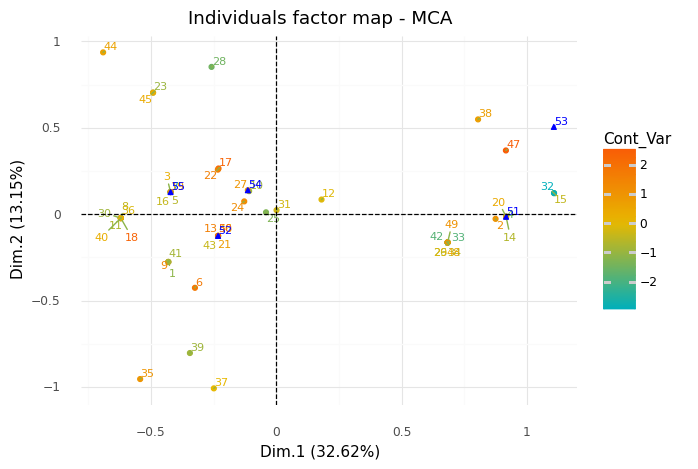

In [11]:
import numpy as np
np.random.seed(123)
color_numpy = np.random.normal(size=res_mca.call_["X"].shape[0])
p = fviz_mca_ind(res_mca,color=color_numpy,repel=True)
print(p)

### Color by kmeans clustering

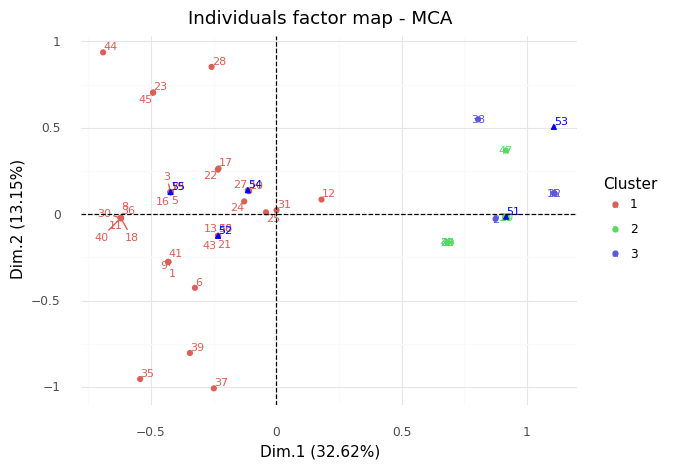

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(res_mca.ind_["coord"])
p = fviz_mca_ind(res_mca,color=kmeans,repel=True)
print(p)

### set limits

#### limit cos2

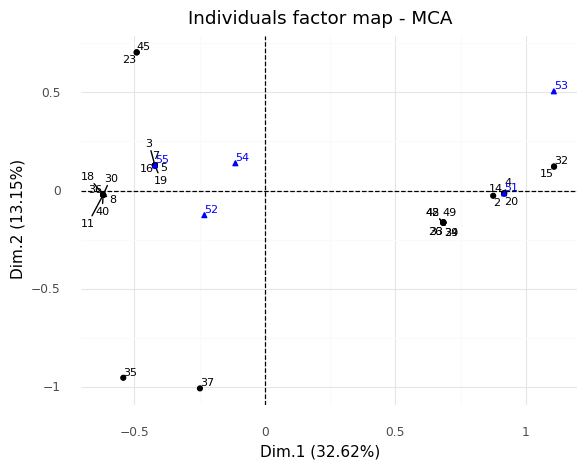

In [13]:
p = fviz_mca_ind(res_mca,lim_cos2=0.5,repel=True)
print(p)

#### limit contrib

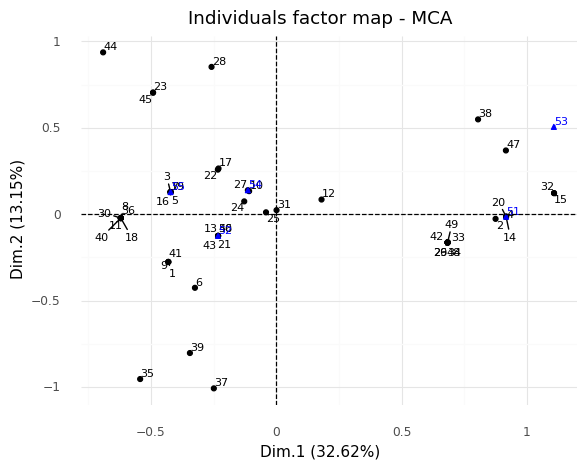

In [14]:
p = fviz_mca_ind(res_mca,lim_contrib=20,repel=True)
print(p)

## Variables

### Color by RGB colors

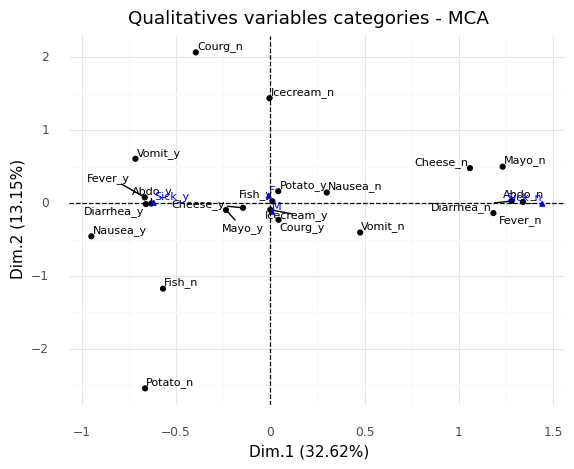

In [15]:
from scientisttools import fviz_mca_mod
p = fviz_mca_mod(res_mca,repel=True)
print(p)

### Color by cos2

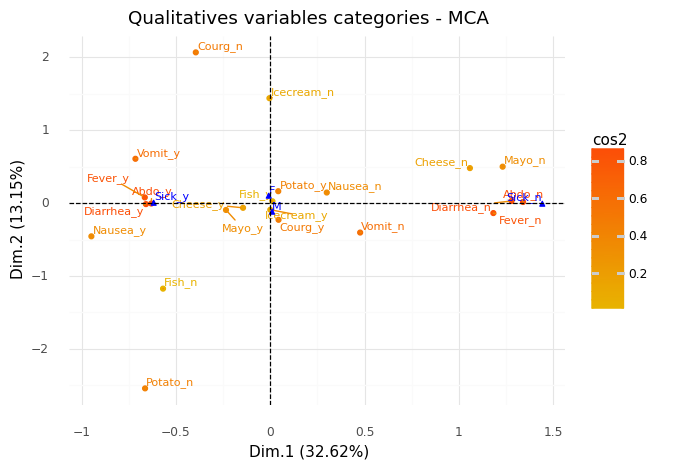

In [16]:
p = fviz_mca_mod(res_mca,color="cos2",repel=True)
print(p)

### Color by contrib

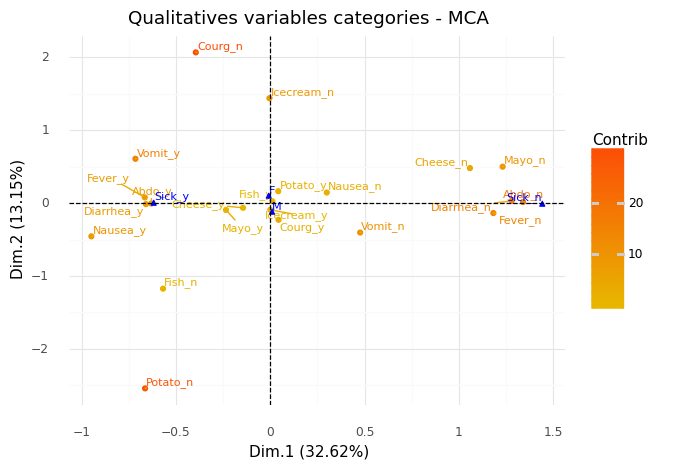

In [17]:
p = fviz_mca_mod(res_mca,color="contrib",repel=True)
print(p)

### Color by numpy array

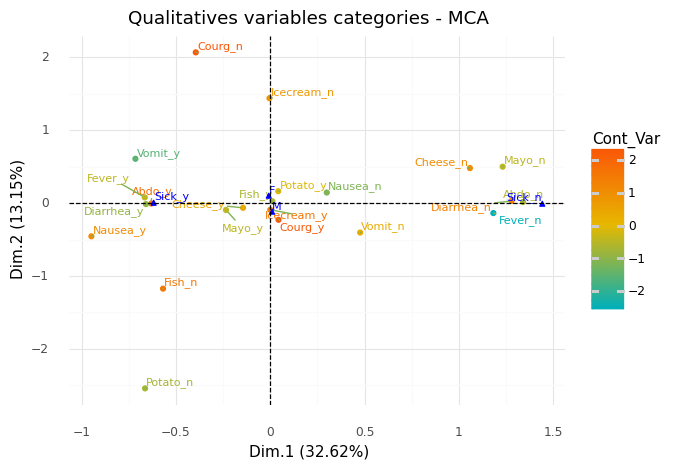

In [18]:
np.random.seed(123)
color_numpy = np.random.normal(size=res_mca.var_["coord"].shape[0])
p = fviz_mca_mod(res_mca,color=color_numpy,repel=True)
print(p)

### Color by kmeans clustering

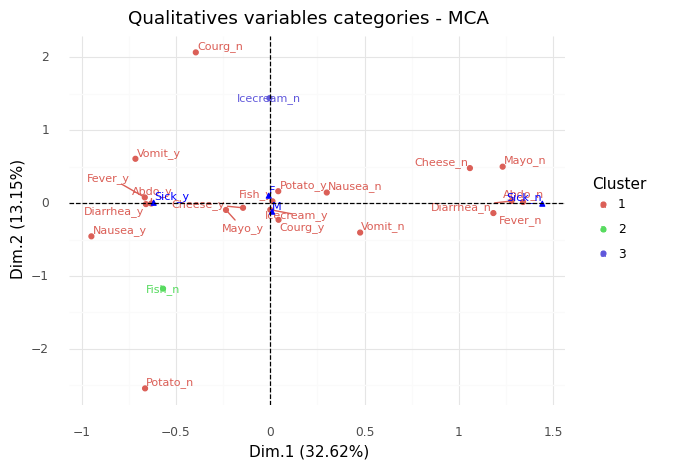

In [19]:
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(res_mca.var_["coord"])
p = fviz_mca_mod(res_mca,color=kmeans,repel=True)
print(p)

### change text type

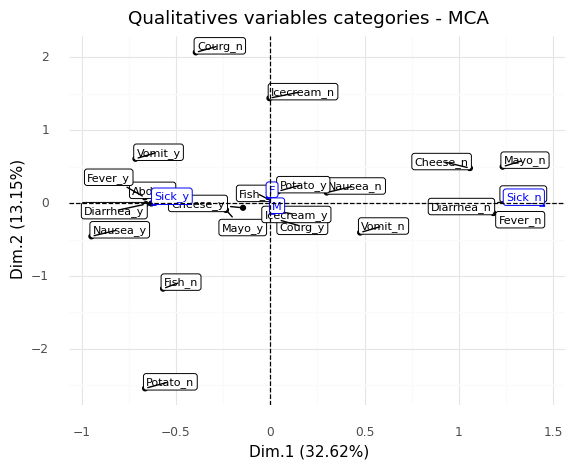

In [20]:
p = fviz_mca_mod(res_mca,text_type="label",repel=True)
print(p)

### Set tlimits

#### limit cos2

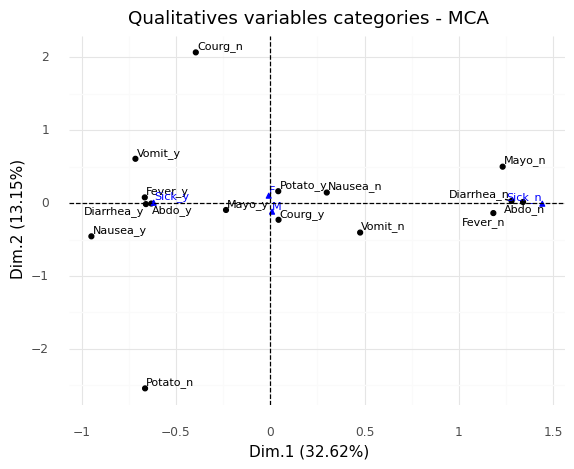

In [21]:
p = fviz_mca_mod(res_mca,lim_cos2=0.3,repel=True)
print(p)

#### limit contrib

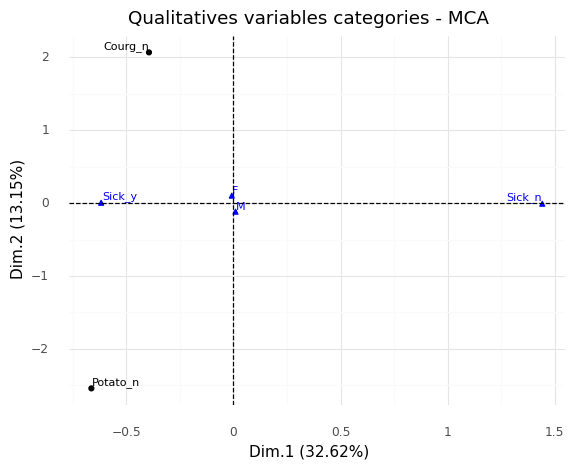

In [22]:
p = fviz_mca_mod(res_mca,lim_contrib=20,repel=True)
print(p)

## Global variables

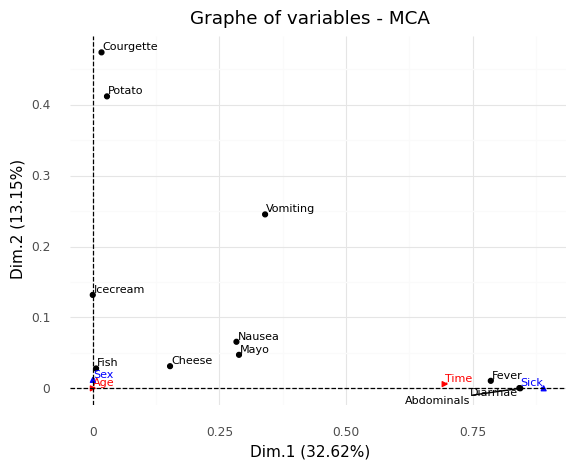

In [23]:
from scientisttools import fviz_mca_var
p  = fviz_mca_var(res_mca,repel=True)
print(p)

### Correlation circle

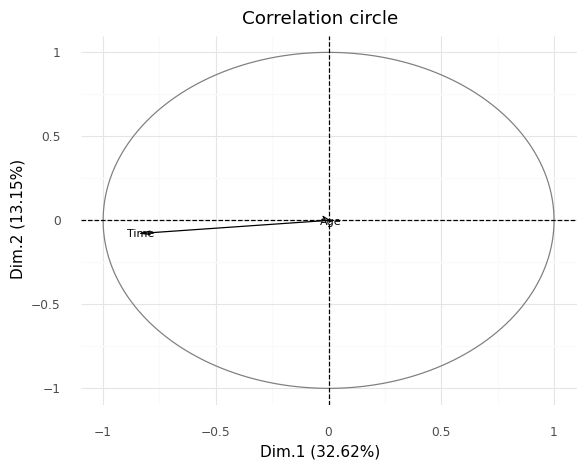

In [24]:
from scientisttools import fviz_corrcircle
p = fviz_corrcircle(res_mca)
print(p)

## Plot contributions

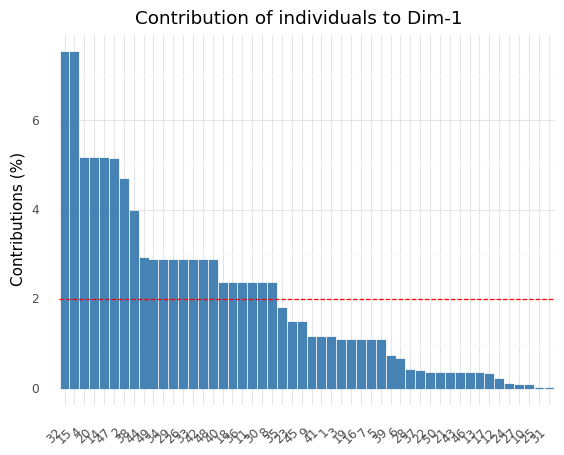

In [25]:
from scientisttools import fviz_contrib
p = fviz_contrib(res_mca,choice="ind")
print(p)

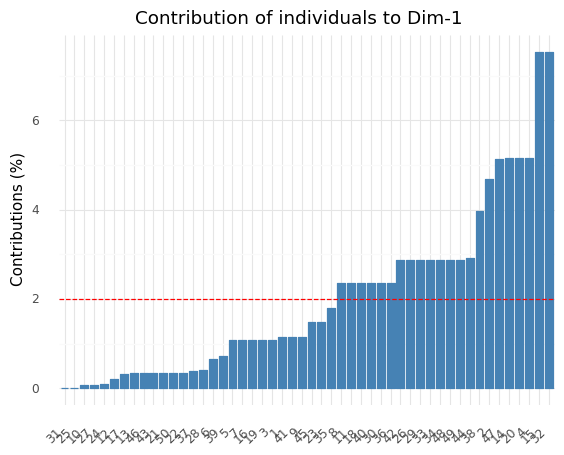

In [26]:
p = fviz_contrib(res_mca,choice="ind",sort_contrib="asc")
print(p)

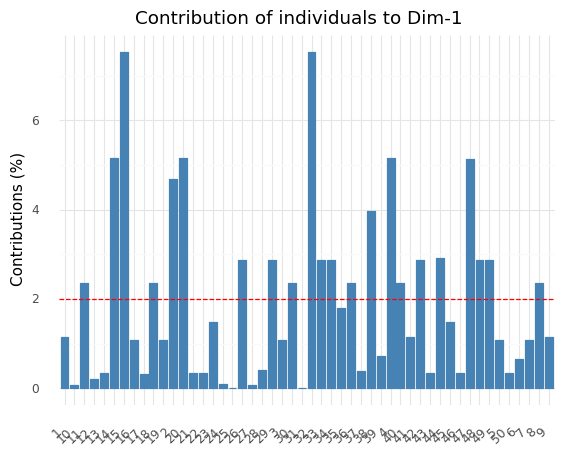

In [27]:
p = fviz_contrib(res_mca,choice="ind",sort_contrib="none")
print(p)

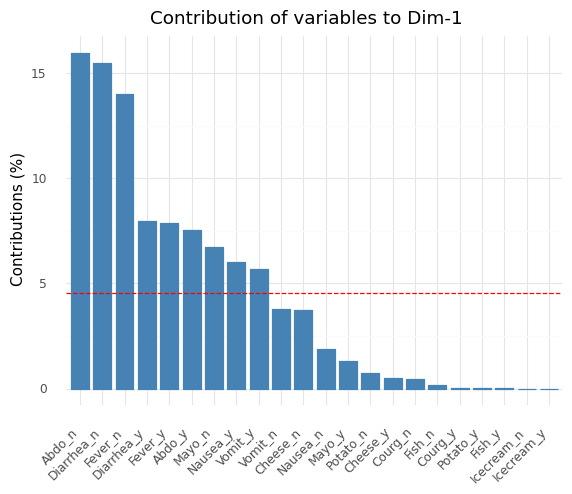

In [28]:
p = fviz_contrib(res_mca,choice="var")
print(p)

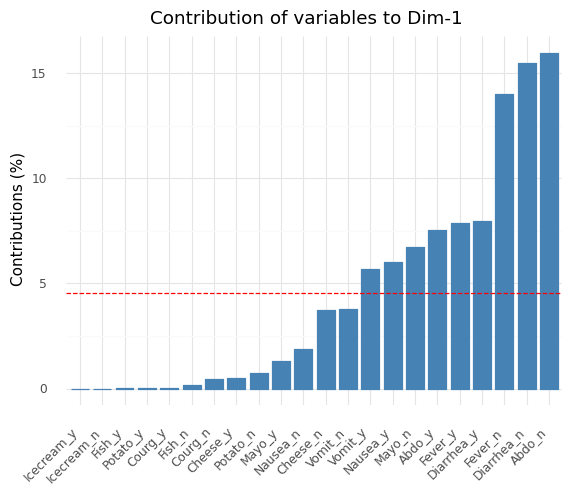

In [29]:
p = fviz_contrib(res_mca,choice="var",sort_contrib="asc")
print(p)

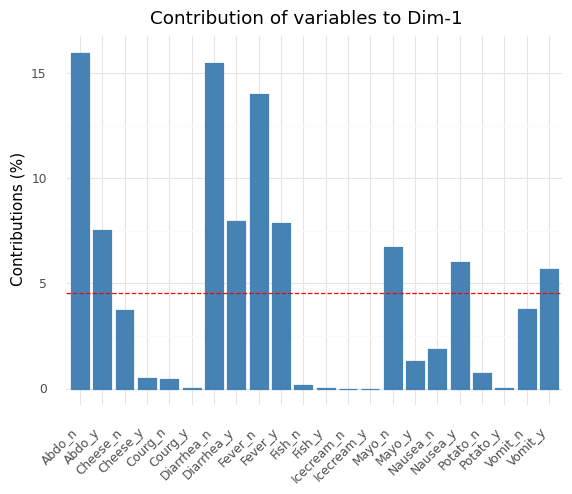

In [30]:
p = fviz_contrib(res_mca,choice="var",sort_contrib="none")
print(p)

## plot cos2

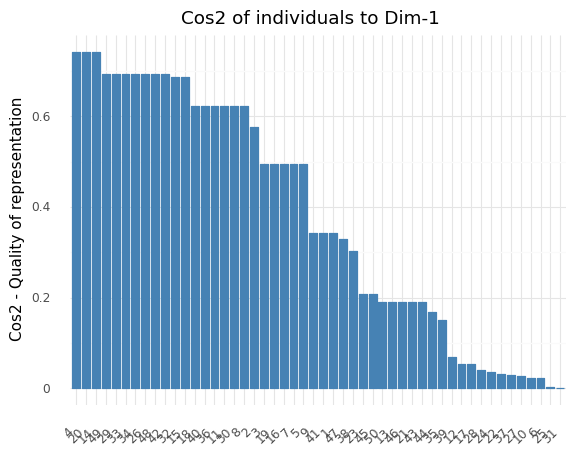

In [31]:
from scientisttools import fviz_cos2
p = fviz_cos2(res_mca)
print(p)

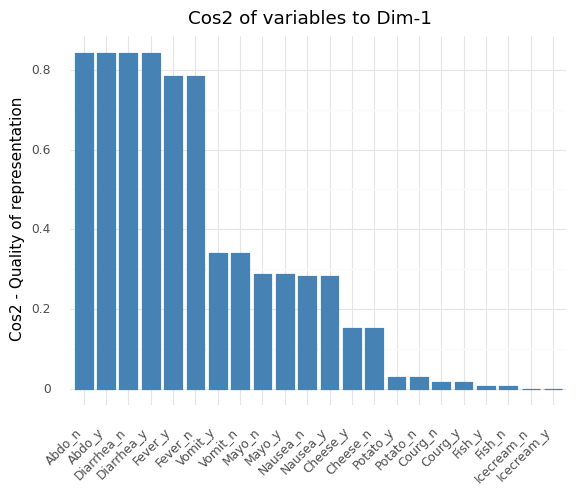

In [32]:
p = fviz_cos2(res_mca,choice = "var")
print(p)

## Biplot

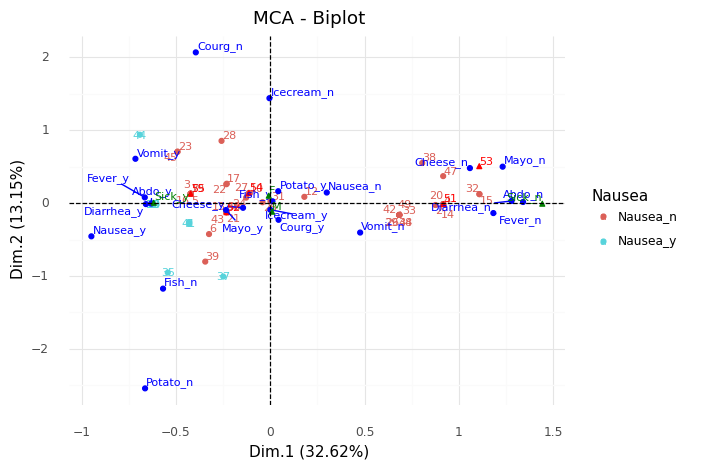

In [33]:
from scientisttools import fviz_mca_biplot
p = fviz_mca_biplot(res_mca,repel=True,habillage="Nausea")
print(p)

## Biplot

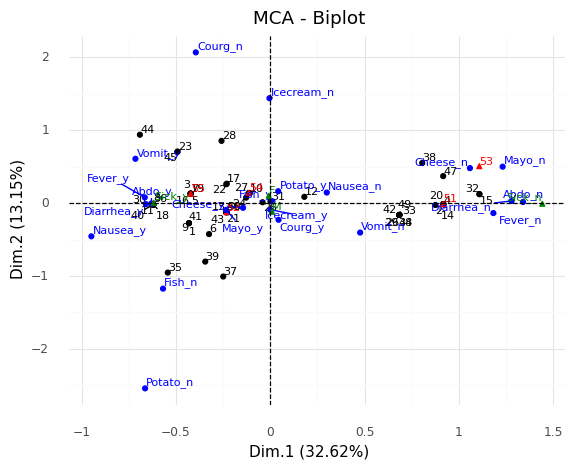

In [35]:
from scientisttools import fviz_mca_biplot
p = fviz_mca_biplot(res_mca,repel=True)
print(p)